<a href="https://colab.research.google.com/github/Aswinraj107/DATA-ANSALYSIS-AND-VISUALISATION/blob/main/EARTHQUAKE%20CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#             NAME - ASWIN RAJ

---



#          email - aswinraj302002@gmail.com

**1)IMPORTING THE DATA**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing the dataset named earthquake_data.csv i got the dataset from https://www.usgs.gov/programs/earthquake-hazards
data = pd.read_csv('earthquake_data.csv')


**2)DISPLAYING THE DATA**

In [3]:
data

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,48.232000,-122.521500,60.580000,3.11,ml,63.0,24.0,0.094040,0.21,uw,uw61918522,"6 km N of Camano, Washington",earthquake,0.400000,0.530000,0.222948,54.0,reviewed,uw,uw
1,-22.998700,170.288200,12.143000,6.10,mww,89.0,47.0,2.650000,0.60,us,us7000k36n,"288 km E of Vao, New Caledonia",earthquake,7.390000,3.933000,0.063000,24.0,reviewed,us,us
2,31.611076,-103.978224,7.879712,3.90,ml,15.0,97.0,0.034838,0.20,tx,tx2023jzjn,"37 km NNW of Toyah, Texas",earthquake,0.848582,0.793366,0.100000,22.0,reviewed,tx,tx
3,60.754800,-150.603900,49.200000,3.10,ml,NaN,NaN,NaN,0.50,ak,ak0236iyhf3i,"19 km SSE of Point Possession, Alaska",earthquake,NaN,0.800000,NaN,NaN,reviewed,ak,ak
4,-23.748500,171.676300,30.492000,5.50,mww,39.0,125.0,4.053000,0.30,us,us6000kdty,southeast of the Loyalty Islands,earthquake,11.050000,5.822000,0.098000,10.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-60.460900,-26.230500,10.000000,5.60,mb,184.0,46.0,17.713000,0.60,us,us6000k6ns,NaN,earthquake,9.270000,1.580000,0.053000,126.0,reviewed,us,us
138,-29.743400,-177.599500,35.000000,5.50,mb,134.0,61.0,0.555000,0.69,us,us6000k6mz,"Kermadec Islands, New Zealand",earthquake,9.010000,1.801000,0.060000,96.0,reviewed,us,us
139,-29.991800,-177.811400,29.000000,7.10,mww,136.0,23.0,0.733000,0.64,us,us6000k6mg,NaN,earthquake,8.150000,1.757000,0.048000,42.0,reviewed,us,us
140,-59.566200,-26.445200,76.656000,5.40,mww,98.0,36.0,7.626000,0.48,us,us6000k6m6,South Sandwich Islands region,earthquake,9.840000,3.435000,0.098000,10.0,reviewed,us,us


**3)CLEANING THE DATA**

In [4]:
data = data.dropna()  # Removing rows with missing values
# Separating the features and target variable here i took magType
X = data.drop('magType', axis=1)
y = data['magType']
# Viewing the first few rows of the dataset
print(data.head())
# viewing the dimensions of the dataset
print(data.shape)
# describing the dataset
print(data.describe())
#Veiwing the data types of each column
print(data.dtypes)
#Veiwing if there are null values
print(data.isnull().sum())

    latitude   longitude       depth   mag magType    nst    gap      dmin  \
0  48.232000 -122.521500   60.580000  3.11      ml   63.0   24.0  0.094040   
1 -22.998700  170.288200   12.143000  6.10     mww   89.0   47.0  2.650000   
2  31.611076 -103.978224    7.879712  3.90      ml   15.0   97.0  0.034838   
4 -23.748500  171.676300   30.492000  5.50     mww   39.0  125.0  4.053000   
6  29.839900  129.128900  184.000000  5.50     mww  137.0   25.0  2.017000   

    rms net          id                             place        type  \
0  0.21  uw  uw61918522      6 km N of Camano, Washington  earthquake   
1  0.60  us  us7000k36n    288 km E of Vao, New Caledonia  earthquake   
2  0.20  tx  tx2023jzjn         37 km NNW of Toyah, Texas  earthquake   
4  0.30  us  us6000kdty  southeast of the Loyalty Islands  earthquake   
6  0.74  us  us6000kdrq        133 km WSW of Kurio, Japan  earthquake   

   horizontalError  depthError  magError  magNst    status locationSource  \
0         0.400

In [5]:
data

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,48.232000,-122.521500,60.580000,3.11,ml,63.0,24.0,0.094040,0.21,uw,uw61918522,"6 km N of Camano, Washington",earthquake,0.400000,0.530000,0.222948,54.0,reviewed,uw,uw
1,-22.998700,170.288200,12.143000,6.10,mww,89.0,47.0,2.650000,0.60,us,us7000k36n,"288 km E of Vao, New Caledonia",earthquake,7.390000,3.933000,0.063000,24.0,reviewed,us,us
2,31.611076,-103.978224,7.879712,3.90,ml,15.0,97.0,0.034838,0.20,tx,tx2023jzjn,"37 km NNW of Toyah, Texas",earthquake,0.848582,0.793366,0.100000,22.0,reviewed,tx,tx
4,-23.748500,171.676300,30.492000,5.50,mww,39.0,125.0,4.053000,0.30,us,us6000kdty,southeast of the Loyalty Islands,earthquake,11.050000,5.822000,0.098000,10.0,reviewed,us,us
6,29.839900,129.128900,184.000000,5.50,mww,137.0,25.0,2.017000,0.74,us,us6000kdrq,"133 km WSW of Kurio, Japan",earthquake,6.960000,1.888000,0.038000,68.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,-0.802600,98.524000,34.000000,7.10,mww,83.0,82.0,2.297000,0.74,us,us7000jvl3,"Kepulauan Batu, Indonesia",earthquake,7.110000,1.854000,0.062000,25.0,reviewed,us,us
135,51.623000,178.496700,27.687000,4.10,mb,45.0,182.0,0.337000,0.52,us,us7000jvkg,"Rat Islands, Aleutian Islands, Alaska",earthquake,7.740000,4.242000,0.093000,32.0,reviewed,us,us
138,-29.743400,-177.599500,35.000000,5.50,mb,134.0,61.0,0.555000,0.69,us,us6000k6mz,"Kermadec Islands, New Zealand",earthquake,9.010000,1.801000,0.060000,96.0,reviewed,us,us
140,-59.566200,-26.445200,76.656000,5.40,mww,98.0,36.0,7.626000,0.48,us,us6000k6m6,South Sandwich Islands region,earthquake,9.840000,3.435000,0.098000,10.0,reviewed,us,us


**4)PREPROCESING THE DATA**

In [6]:
# Droping irrelevant columns
columns_to_drop = ['id', 'locationSource', 'magSource','place']
print(columns_to_drop)
data = data.drop(columns_to_drop, axis=1)
# Filling missing values if any
data = data.fillna(0)  
# Converting categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['net', 'magType', 'type'])
X = data_encoded.drop('status', axis=1)
y = data_encoded['status']


['id', 'locationSource', 'magSource', 'place']


**5)SPLITTING THE DATASET INTO TRAINING AND TESTING SET**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**6)TRAINING A CLASSIFICATION MODEL**

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

**7)MKAING PREDICITIONS**

In [9]:
y_pred = clf.predict(X_test)

**8)EVALUATING THE MODELS PERFORMANCE**

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    reviewed       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[18]]


**9)FEATURE SCALING**

In [11]:
from sklearn.preprocessing import StandardScaler
# Performing feature scaling on numerical columns
numerical_columns = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


**10)CROSS VALIDATION**

In [12]:
from sklearn.model_selection import cross_val_score
# Performing cross-validation on the classifier
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [1.         1.         0.92857143 1.         1.        ]
Mean Cross-Validation Score: 0.9857142857142858


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


**11)HYPERPARAMETER TUNING**

In [13]:
from sklearn.model_selection import GridSearchCV
# Here I am defining the parameter grid to search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Performing grid search to find the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model:", best_model)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model: DecisionTreeClassifier()


**12)MODEL EVALUTAION WITH TESTSET**

In [14]:
# Making predictions using the best model
y_pred = best_model.predict(X_test)
# Evaluating the model's performance on the test set
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    reviewed       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[18]]


# GRAPHS AND PLOTS

**1)SCATTER PLOT**

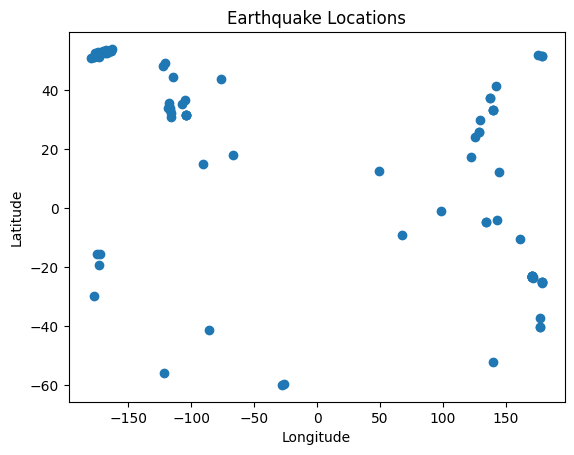

In [15]:
import matplotlib.pyplot as plt
plt.scatter(data['longitude'], data['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Locations')
plt.show()


**2)BOX PLOT**

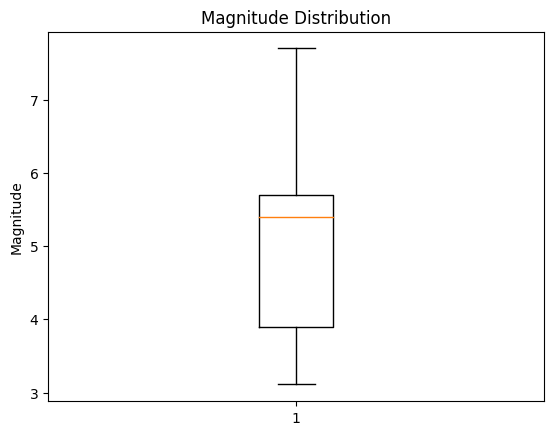

In [16]:
plt.boxplot(data['mag'])
plt.ylabel('Magnitude')
plt.title('Magnitude Distribution')
plt.show()



**3)BAR PLOT**

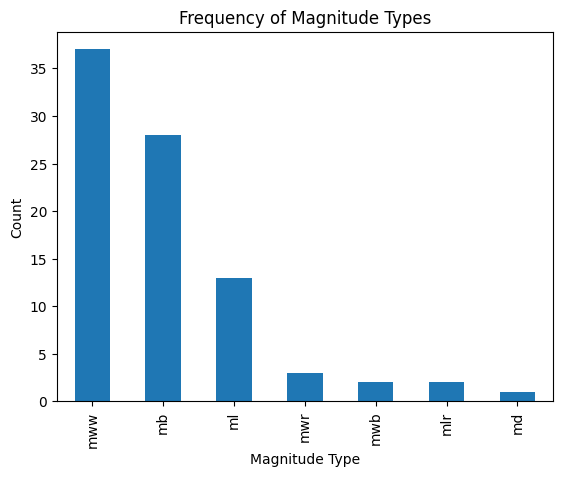

In [17]:
data['magType'].value_counts().plot(kind='bar')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.title('Frequency of Magnitude Types')
plt.show()


**4)HEAT MAP**

<ipython-input-18-e5bb0854f9ad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


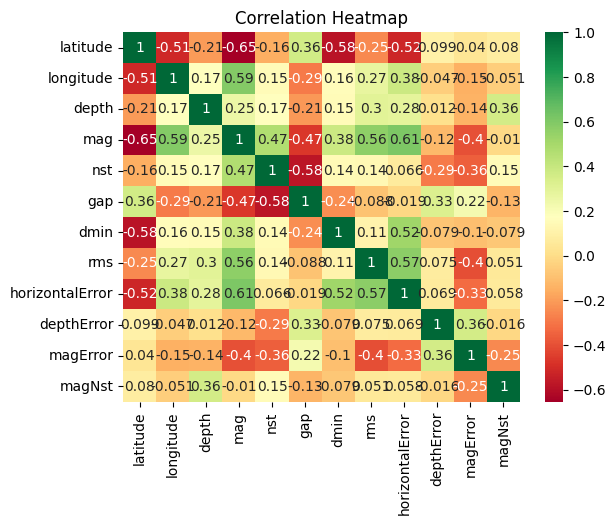

In [18]:
import seaborn as sns

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()


**5)CORRELATION MATRIX**

<ipython-input-19-1c3adbea2e1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


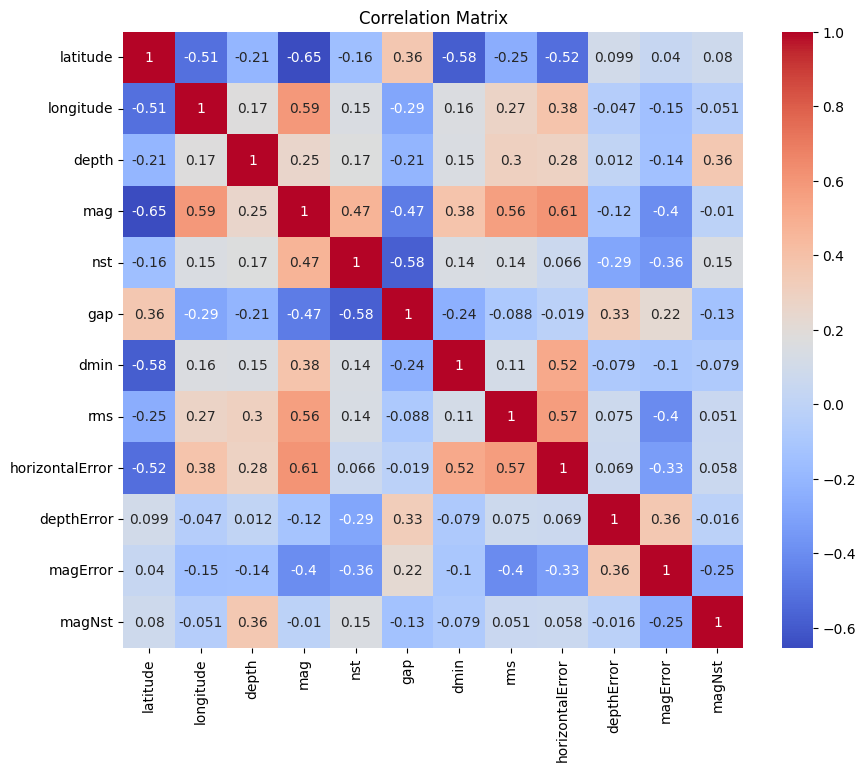

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**6)HISTOGRAM**

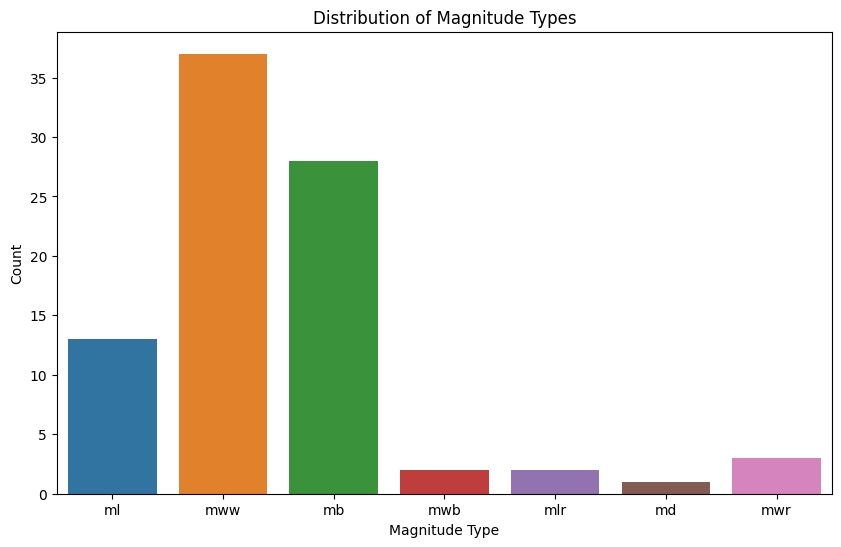

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='magType', data=data)
plt.title('Distribution of Magnitude Types')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.show()